# `52-Logistic Regression Heart`

# 1. Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [8]:
ht = pd.read_csv('heart_v2.csv')

In [10]:
ht.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [12]:
ht.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [14]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [16]:
ht.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [18]:
ht.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

# 3. Exploring Data Insights

In [21]:
sns.set_palette("rainbow")
sns.set_style("whitegrid")

<Axes: xlabel='heart disease', ylabel='count'>

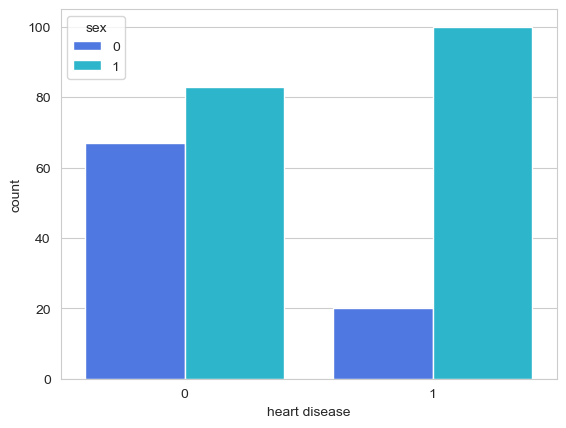

In [23]:
sns.countplot(x='heart disease', hue='sex', data=ht)

<Axes: >

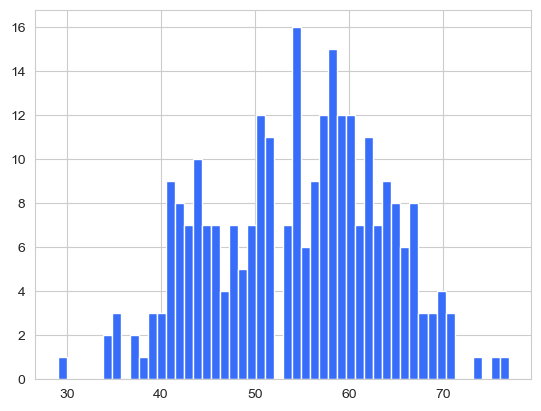

In [25]:
ht['age'].hist(bins=50)

# 4. Training and Testing Data

In [28]:
ht.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [30]:
X = ht.drop('heart disease', axis=1)
y = ht['heart disease']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Training Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
import joblib
joblib.dump(model, "model.pkl")
print("✅ Model saved as model.pkl")

✅ Model saved as model.pkl


In [43]:
y_pred = model.predict(X_test)

# 5. Evaluating Model

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7058823529411765

Confusion Matrix:
 [[31  9]
 [11 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        40
           1       0.65      0.61      0.63        28

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.71      0.70        68



# 6. Predict New Data

In [51]:
# new_patient = [X.mean().values, columns=X.columns]
new_patient = pd.DataFrame([{
    'age': 71,
    'sex': 0,
    'BP': 120,
    'cholestrol': 564
}])
predicted_disease = model.predict(new_patient)
print("Predicted Heart Disease: ", "Yes" if predicted_disease[0] == 1 else "No Disease")

Predicted Heart Disease:  Yes
